# AM207 Final Project - Data Exploration

Data source: https://www.cdc.gov/nchs/nhis/2023nhis.htm

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from zipfile import ZipFile

In [4]:
zip_file = ZipFile("data/adult23csv.zip")

df = pd.read_csv(zip_file.open('adult23.csv'))

In [5]:
print(f"Number of adults included in the 2023 National Health Interview Survey: {df.shape[0]:,}")
print(f"Number of columns in the dataset: {df.shape[1]}")
print()
df.head()

Number of adults included in the 2023 National Health Interview Survey: 29,522
Number of columns in the dataset: 647



,URBRRL,RATCAT_A,INCTCFLG_A,IMPINCFLG_A,LANGSPECR_A,LANGSOC_A,LANGDOC_A,LANGMED_A,LANGHM_A,PPSU,...,PROXYREL_A,PROXY_A,AVAIL_A,HHSTAT_A,INTV_MON,RECTYPE,IMPNUM_A,WTFA_A,HHX,POVRATTC_A
0,3,4,0,0,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,1,1,1,10,1,7371.139,H029691,1.01
1,4,8,0,0,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,1,1,1,10,1,3146.794,H028812,2.49
2,4,14,0,0,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,1,1,1,10,1,10807.558,H045277,6.73
3,4,10,0,0,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,1,1,1,10,1,4661.643,H021192,3.43
4,4,5,0,0,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,1,1,1,10,1,10929.554,H025576,1.27


In [6]:
num_longcovid_responses = int(df['LONGCOVD1_A'].notna().sum())
num_survey_participants = df.shape[0]
print(f"Out of {num_survey_participants:,}, only {num_longcovid_responses:,} answered the question about long covid.")

Out of 29,522, only 15,354 answered the question about long covid.


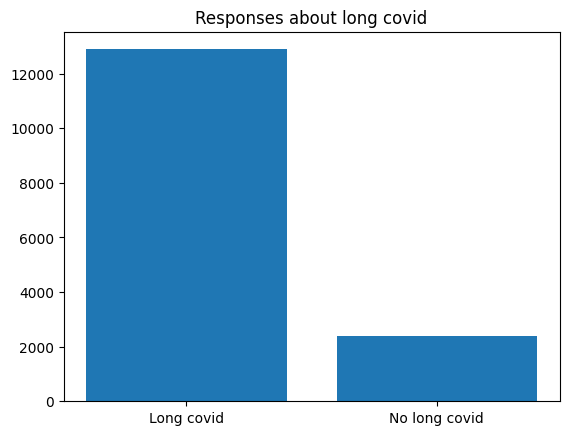

In [7]:
# excludes those who answered 'dont know'
temp = df[~df['LONGCOVD1_A'].isin([9])]['LONGCOVD1_A']
counts = temp.value_counts()
plt.bar(['Long covid', 'No long covid'], counts.values)
plt.title("Responses about long covid")
plt.show()

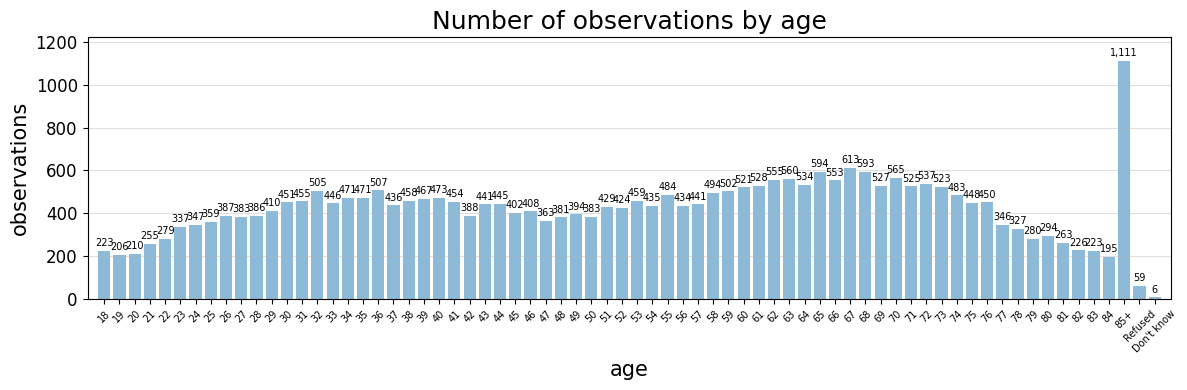

In [8]:
def plot_value_counts(value_counts, var_name, font_perc):
    """Generates barplot from pandas value_counts series"""
    fig, ax = plt.subplots(figsize=(12, 4))

    max_y = max(value_counts.values)
    n_cats = len(value_counts)

    ax.bar(range(n_cats), value_counts.values, alpha=0.5)

    for x, y in enumerate(value_counts):
        ax.text(
            x, y+max_y*.02,
            "{:,}".format(y),
            color="k",
            fontsize=14*font_perc,
            horizontalalignment="center"
        ) 

    ax.set_title(
        "Number of observations by {}".format(
            var_name
        ),
        fontsize=18
    )

    labels = df["AGEP_A"].value_counts().sort_index().index.to_list()
    labels = ["85+" if i == 85 else "Refused" if i == 97 else "Don't know" if i == 99 else i for i in labels]
    ax.set_xlabel("{}".format(var_name), fontsize=15)
    ax.set_ylabel("observations", fontsize=15)
    ax.set_xticks(range(n_cats))
    ax.set_xticklabels(labels, rotation=45)#value_counts.index)
    ax.tick_params("x", labelsize=14*font_perc)
    ax.tick_params("y", labelsize=12)
    ax.set_ylim(top=max_y+(max_y*.1))

    ax.grid(":", axis="y", alpha=0.4)
    ax.margins(x=.01)
    plt.tight_layout()
    plt.show();

# plot and print summary of resulting district values
age_counts = df["AGEP_A"].value_counts().sort_index()

plot_value_counts(age_counts, "age", .5)

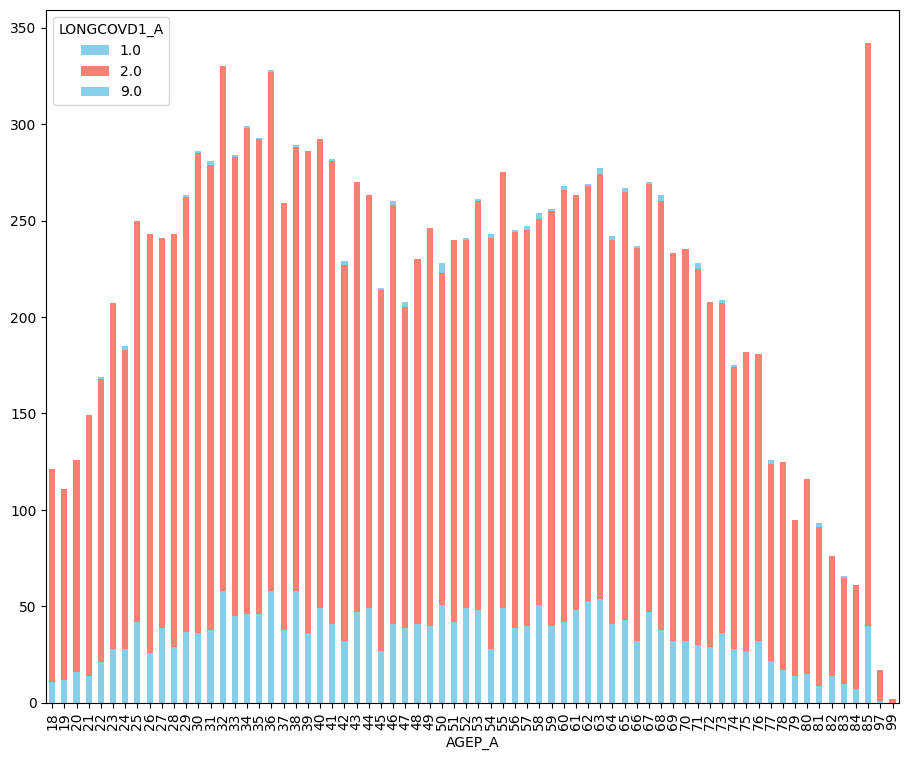

In [41]:
counts = df.groupby(['AGEP_A', "LONGCOVD1_A"]).size().unstack(fill_value=0)

counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(11,9))
plt.show()

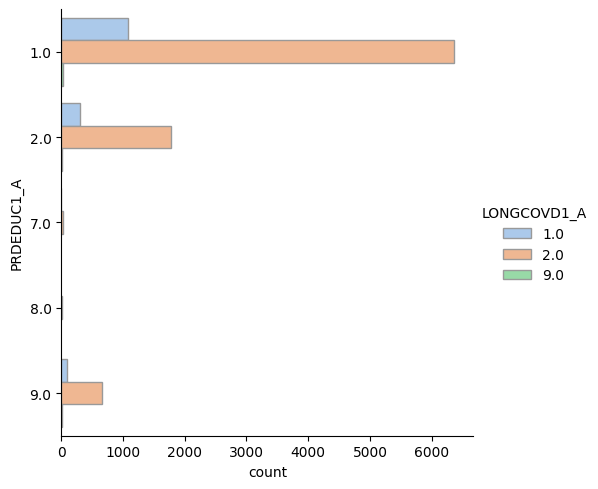

In [12]:
df["PRDEDUC1_A"]

sns.catplot(
    data=df, y="PRDEDUC1_A", hue="LONGCOVD1_A", kind="count",
    palette="pastel", edgecolor=".6",
)